# Project on Modelling_Car_Insurance_Claim_Outcomes

<center><img src="car.jpg" width=500></center>


Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

(`Source: https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf`) 

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [3]:
# Import required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit

df = pd.read_csv("car_insurance.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [4]:
corr = df.corr()['outcome'].sort_values(ascending=False)

# Visualize
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90)
plt.title("Correlation with Target (outcome)")
plt.show()

ValueError: could not convert string to float: '0-9y'

In [6]:
boolic = {"Yes": 1, "No": 0, "Male": 1, "Female": 0, 1.0: 1, 0.0: 0}
df = df.replace(boolic)
df["outcome"]=df["outcome"].astype("int")
print(df.head())

       id  age  gender driving_experience    education         income  \
0  569520    3       0               0-9y  high school    upper class   
1  750365    0       1               0-9y         none        poverty   
2  199901    0       0               0-9y  high school  working class   
3  478866    0       1               0-9y   university  working class   
4  731664    1       1             10-19y         none  working class   

   credit_score  vehicle_ownership vehicle_year  married  children  \
0      0.629027                1.0   after 2015      0.0       1.0   
1      0.357757                0.0  before 2015      0.0       0.0   
2      0.493146                1.0  before 2015      0.0       0.0   
3      0.206013                1.0  before 2015      0.0       1.0   
4      0.388366                1.0  before 2015      0.0       0.0   

   postal_code  annual_mileage vehicle_type  speeding_violations  duis  \
0        10238         12000.0        sedan                    0  

In [7]:
X = df[["age","gender","driving_experience","education","income","credit_score","vehicle_ownership","vehicle_year","married","children","annual_mileage","vehicle_type","speeding_violations","duis","past_accidents"]]
X["outcome"] = df["outcome"]
X.head()


C:\Users\vinay\AppData\Local\Temp\ipykernel_36932\331733375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["outcome"] = df["outcome"]


,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,12000.0,sedan,0,0,0,0
1,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,16000.0,sedan,0,0,0,1
2,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,11000.0,sedan,0,0,0,0
3,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0
4,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,12000.0,sedan,2,0,1,1


In [11]:
dict_replacer= {"0-9y": 0, "10-19y": 1, "20-29y": 2, "30y+": 3, "none": 0, "high school": 1, "university": 2, "poverty" : 0, "working class": 1, "middle class": 2, "upper class": 3, "after 2015": 1, "before 2015": 0, "sedan": 0, "sports car": 1}
X = X.replace(dict_replacer)
X.head()


C:\Users\vinay\AppData\Local\Temp\ipykernel_36932\4131177050.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace(dict_replacer)


,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,3,0,0,1,3,0.629027,1.0,1,0.0,1.0,12000.0,0,0,0,0,0
1,0,1,0,0,0,0.357757,0.0,0,0.0,0.0,16000.0,0,0,0,0,1
2,0,0,0,1,1,0.493146,1.0,0,0.0,0.0,11000.0,0,0,0,0,0
3,0,1,0,2,1,0.206013,1.0,0,0.0,1.0,11000.0,0,0,0,0,0
4,1,1,1,0,1,0.388366,1.0,0,0.0,0.0,12000.0,0,2,0,1,1


In [12]:
List_of_col = ["age","gender","driving_experience","education","income","credit_score","vehicle_ownership","vehicle_year","married","children","annual_mileage","vehicle_type","speeding_violations","duis","past_accidents"]



def accuracy_measure(outcome, feature, df):
    inout = f"{outcome} ~ {feature}"
    model = logit(inout, data=df).fit()
    conf_matrix = model.pred_table()
    TN = conf_matrix[0,0]
    TP = conf_matrix[1,1]
    FN = conf_matrix[1,0]
    FP = conf_matrix[0,1]
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    return accuracy
    
best_accuracy = 0
for feature in List_of_col:
    new_accuracy = accuracy_measure("outcome", f"{feature}", X)
    if new_accuracy > best_accuracy:
        best_accuracy = new_accuracy
        best_feature = feature
    else:
        pass

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467390
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.603848
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531580
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567469
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

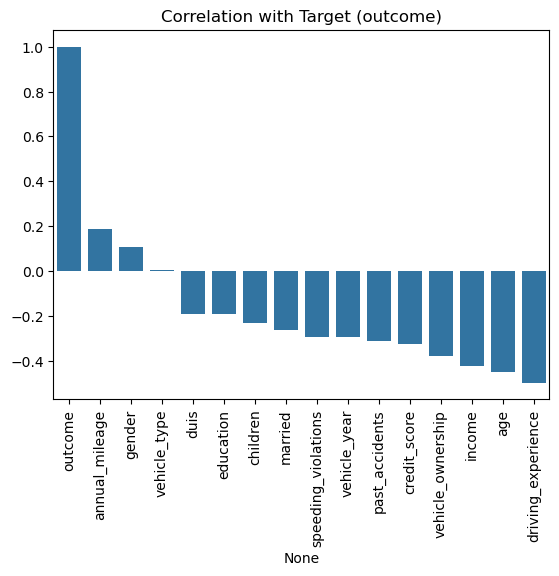

In [13]:
corr = X.corr()['outcome'].sort_values(ascending=False)

# Visualize
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90)
plt.title("Correlation with Target (outcome)")
plt.show()

In [14]:
print(f"best feature is {best_feature} and best accuracy is {best_accuracy}")

best feature is driving_experience and best accuracy is 0.7771


In [15]:
best_feature_df = pd.DataFrame([{"best_feature":best_feature, "best_accuracy":best_accuracy}])